In [1]:
import os
import imageio
import numpy as np
import librosa
import librosa.display
from scipy.io import wavfile
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from IPython.display import Audio

# Play an audio file

In [2]:
file_path = r"FSDD Mini\0\0_george_0.wav"
Audio(file_path)

# Load audio using librosa

In [3]:
y, sr = librosa.load(file_path)
print(f'Sample rate: {sr} Hz')
duration = librosa.get_duration(y=y, sr=sr)
print(f'Duration: {duration} seconds')
if len(y.shape) == 1:
    ch = 1
elif len(y.shape) == 2:
    ch = 2
print(f'Num. channels: {ch}')

Sample rate: 22050 Hz
Duration: 0.2980045351473923 seconds
Num. channels: 1


# Display

## Waveform

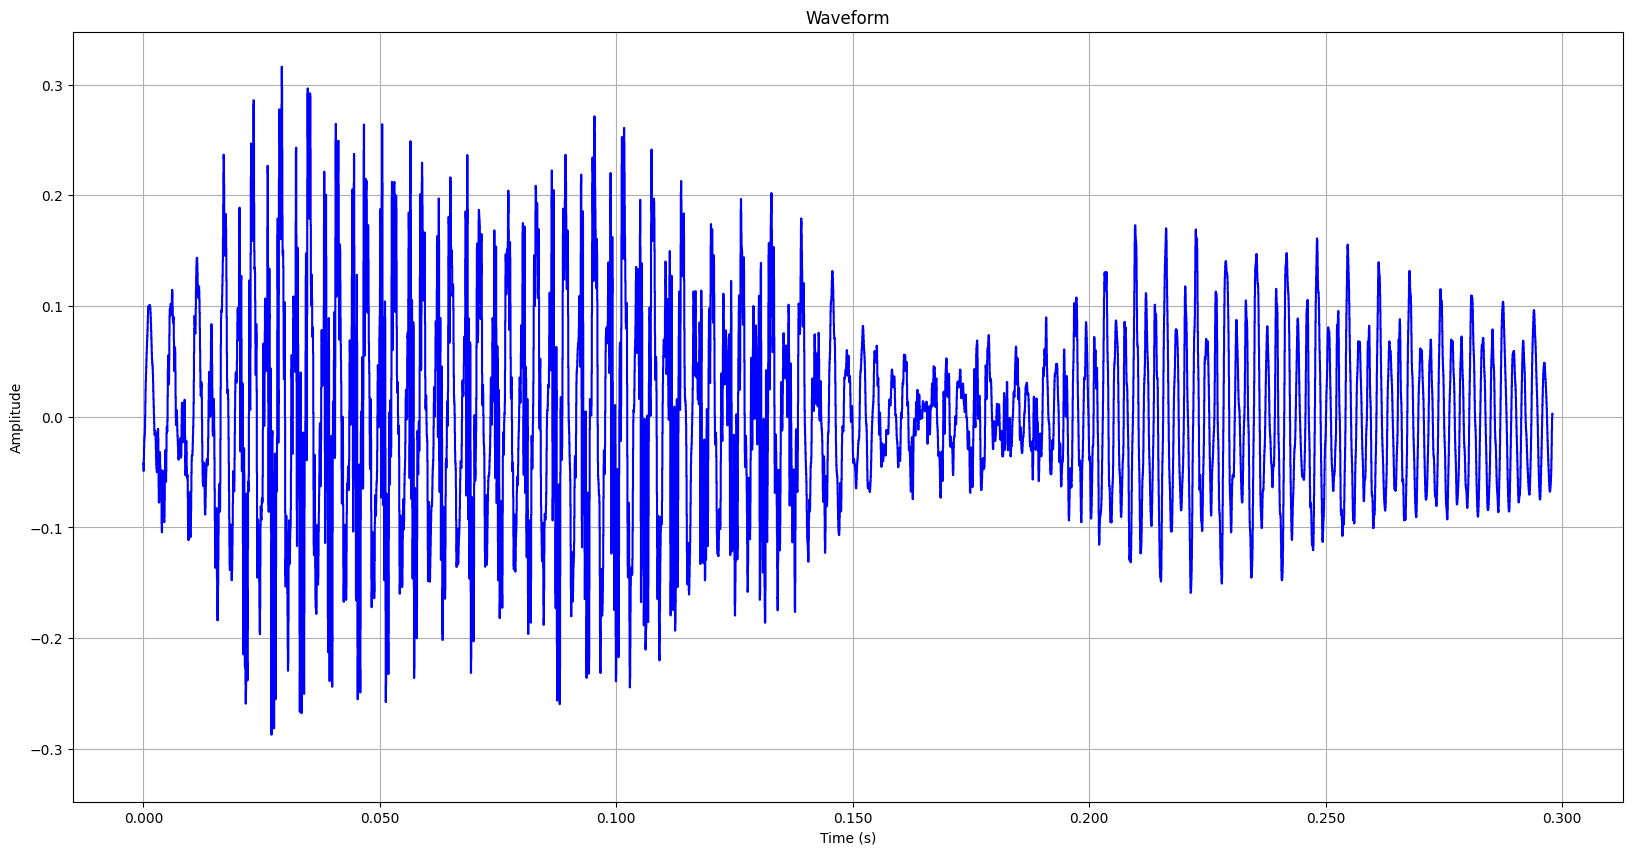

In [4]:
y, sr = librosa.load(file_path)

plt.figure(figsize=(20, 10))  # Increase figure size
librosa.display.waveshow(y, sr=sr, color='b')  # Change color to blue
plt.title('Waveform')
plt.xlabel('Time (s)')  # Add x label with units
plt.ylabel('Amplitude')  # Add y label
plt.grid(True)  # Add a grid
plt.show()

## Spectogram

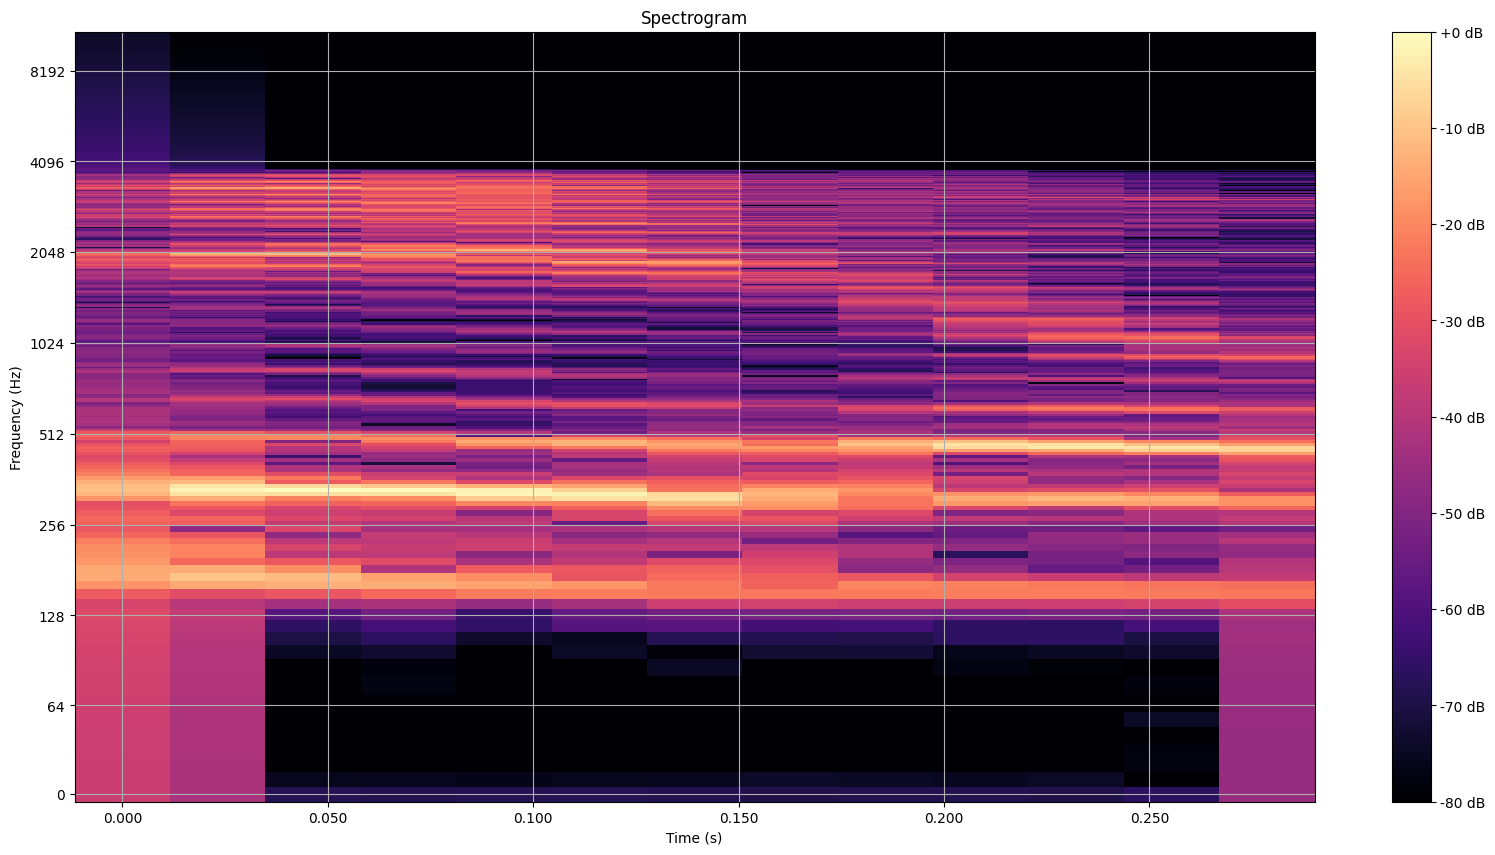

In [5]:
y, sr = librosa.load(file_path)

D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

plt.figure(figsize=(20, 10))  # Increase figure size
img = librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(img, format='%+2.0f dB')  # Add colorbar
plt.title('Spectrogram')
plt.xlabel('Time (s)')  # Add x label with units
plt.ylabel('Frequency (Hz)')  # Add y label with units
plt.grid(True)  # Add a grid
plt.show()


## Mel Spectrogram

A Mel spectrogram is a type of spectrogram where the frequencies are converted to the Mel scale. The Mel scale is a perceptual scale of pitches judged by listeners to be equal in distance from one another. 

In the context of audio signal processing, a Mel spectrogram is a representation of the short-term power spectrum of a sound. It is based on a linear cosine transform of a log power spectrum on a nonlinear Mel scale of frequency. 

The Mel spectrogram is computed by applying a frequency-domain filter bank to audio signals that are windowed in time. This results in a 2D representation where the rows correspond to the Mel frequency bands and the columns correspond to different time frames in the audio signal. The value at each point in the array represents the intensity of a particular Mel frequency in a particular time frame.

This kind of representation is particularly useful in many audio processing tasks, including speech recognition and music information retrieval, because it closely approximates the human auditory system's response to different frequencies.

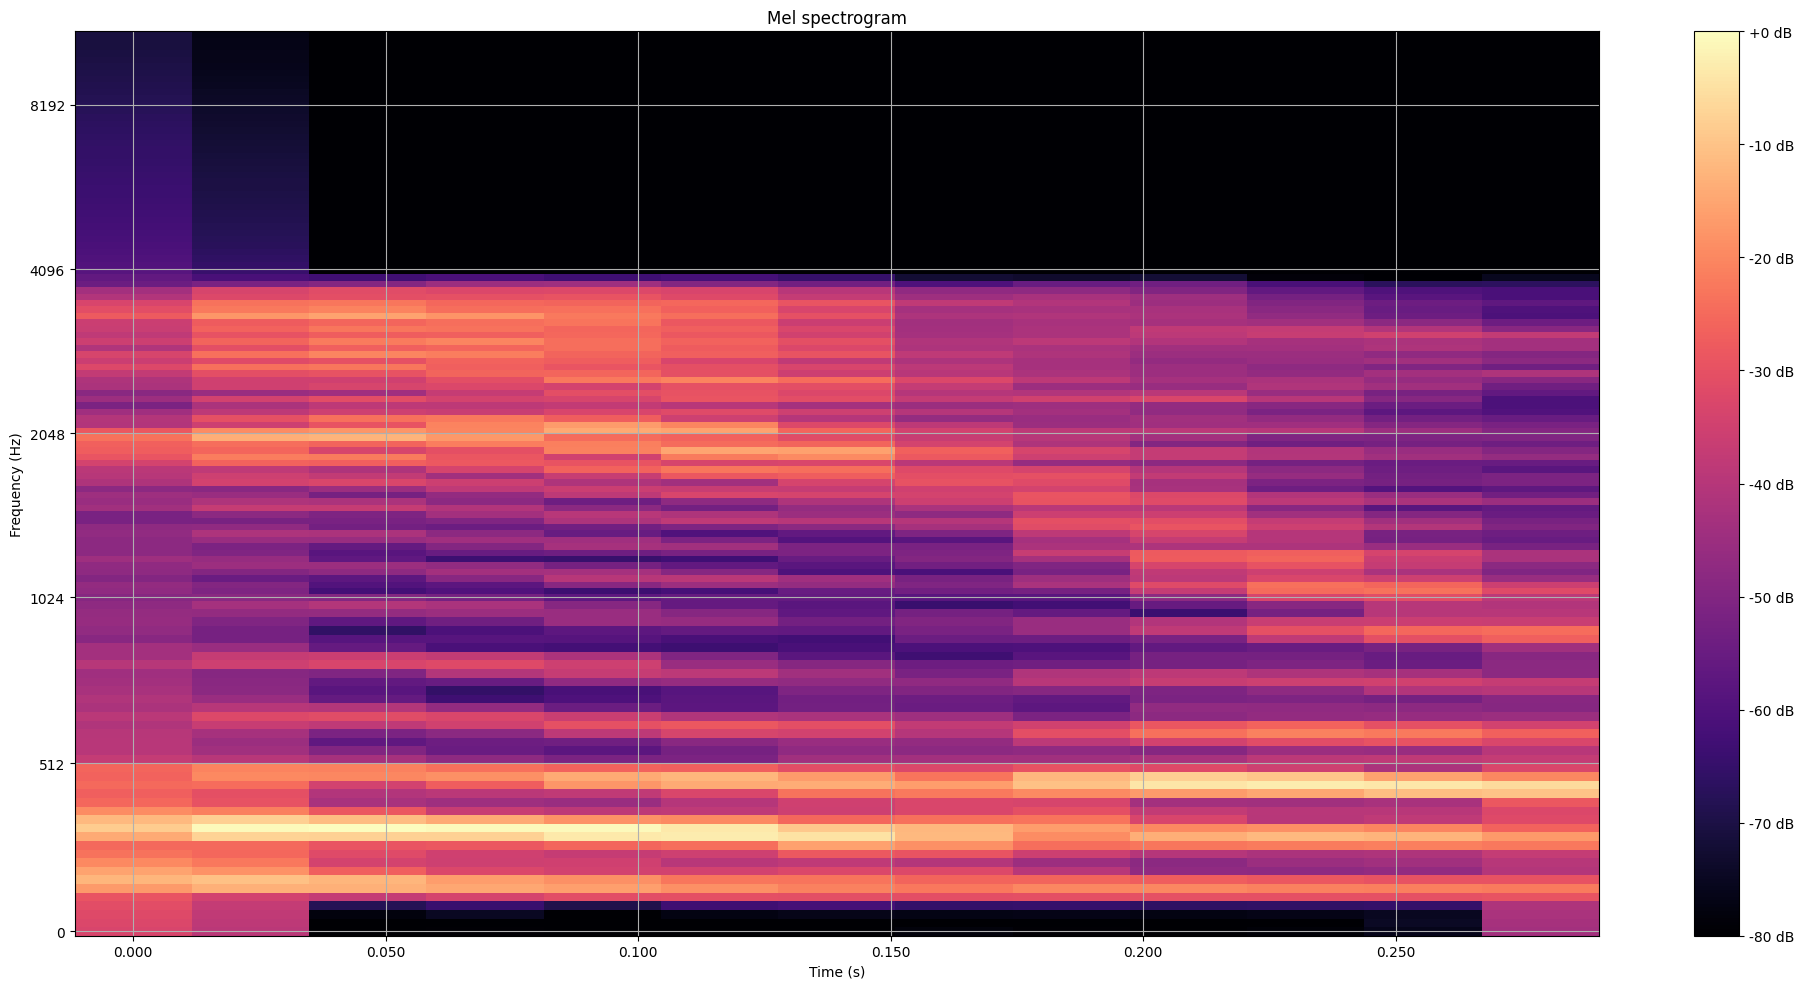

In [6]:
y, sr = librosa.load(file_path)
n_mels=128

S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
log_S = librosa.power_to_db(S, ref=np.max)

# Display the Mel spectrogram
plt.figure(figsize=(20, 10))  # Increase figure size
img = librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
plt.title('Mel spectrogram')
plt.xlabel('Time (s)')  # Add x label with units
plt.ylabel('Frequency (Hz)')  # Add y label with units
plt.colorbar(img, format='%+02.0f dB')  # Add colorbar
plt.grid(True)  # Add a grid
plt.tight_layout()
plt.show()

## Chromagram

A chromagram is a graphical representation of the chroma content of an audio signal. Chroma features are an interesting and powerful representation for music audio in which the entire spectrum is projected onto 12 bins representing the 12 distinct semitones (or chroma) of the musical octave.

Since, in music, notes exactly one octave apart are perceived as particularly similar, knowing the distribution of such features over different time frames can be very useful in music information retrieval, such as genre classification, chord recognition, and key detection.

In the context of signal processing, a chromagram is usually calculated as the output of a bank of chroma filters on an audio spectrogram. It’s a way to visualize how intensities in each of these 12 semitone bins change over time. This can be very useful in music analysis and is often used in automatic music transcription systems.

librosa.feature.chroma_stft is used to compute a chromagram from a waveform or power spectrogram. This function first applies a Short-Time Fourier Transform (STFT) to the audio signal to create a spectrogram, then maps the spectrogram to the 12 chroma bands. The result is a 2D array where the rows correspond to the 12 chroma bands and the columns correspond to different time frames in the audio signal. The value at each point in the array represents the intensity of a particular chroma in a particular time frame.

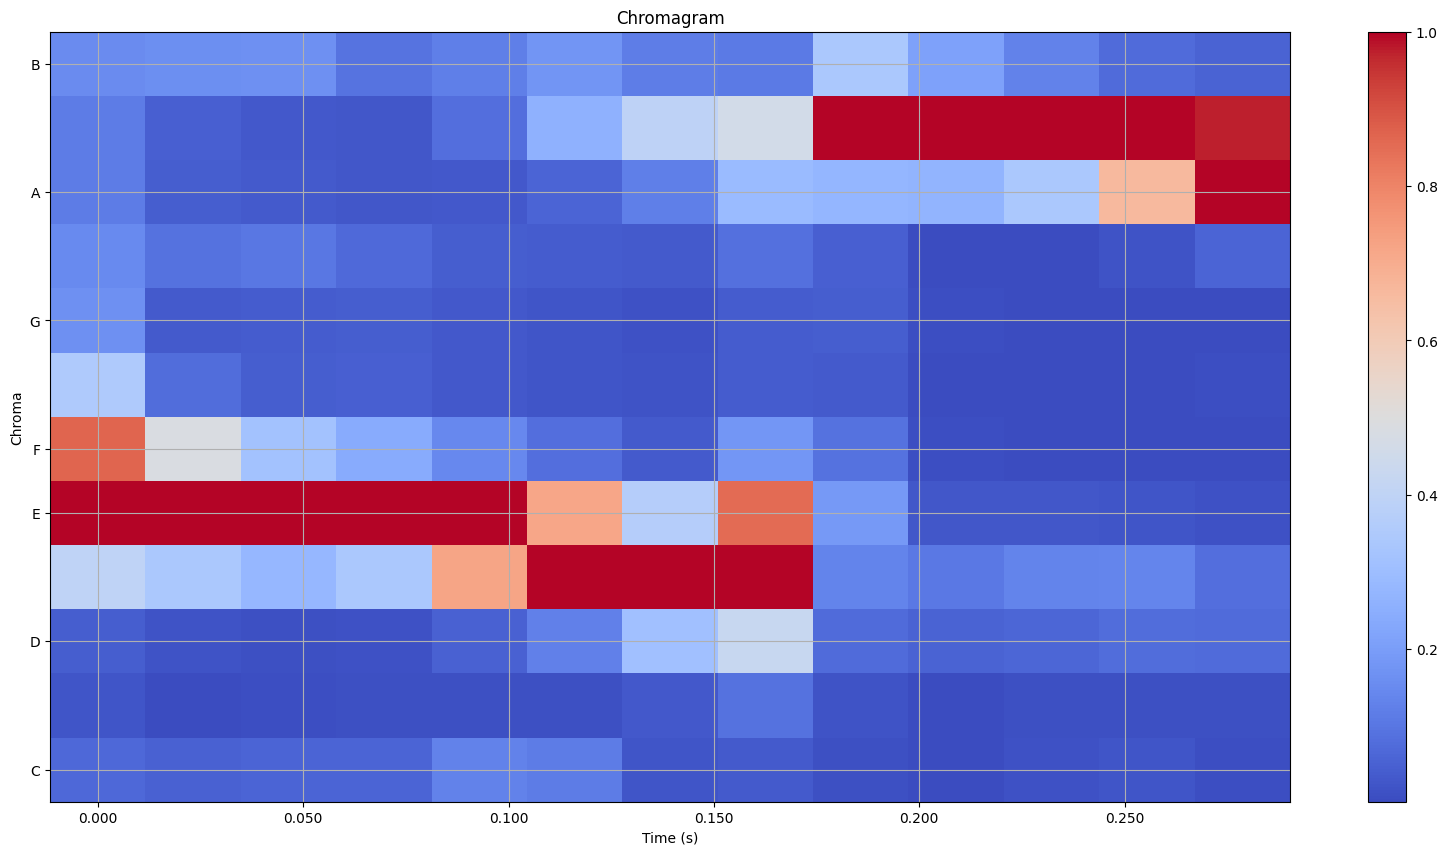

In [7]:
y, sr = librosa.load(file_path)

chromagram = librosa.feature.chroma_stft(y=y, sr=sr)

plt.figure(figsize=(20, 10))  # Increase figure size
img = librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', cmap='coolwarm')
plt.title('Chromagram')
plt.xlabel('Time (s)')  # Add x label with units
plt.ylabel('Chroma')  # Add y label
plt.colorbar(img)  # Add colorbar
plt.grid(True)  # Add a grid
plt.show()

## Mel Frequency Cepstral Coefficient (MFCC)

Mel Frequency Cepstral Coefficients (MFCCs) are a type of feature used in signal processing and machine learning for audio analysis1. They provide a representation of the short-term power spectrum of a sound, based on a linear cosine transform of a log power spectrum on a nonlinear mel scale of frequency.

The process of calculating MFCCs involves several steps:

1. Take the Fourier transform of a windowed excerpt of a signal.
2. Map the powers of the spectrum obtained above onto the mel scale, using triangular overlapping windows.
3. Take the logs of the powers at each of the mel frequencies.
4. Take the discrete cosine transform of the list of mel log powers, as if it were a signal.

The MFCCs are the amplitudes of the resulting spectrum. The mel scale is designed to mimic the non-linear human ear perception of pitch, which makes it a very effective feature for speech and music analysis. MFCCs are commonly used in speech recognition systems, music information retrieval applications, and other audio processing tasks.

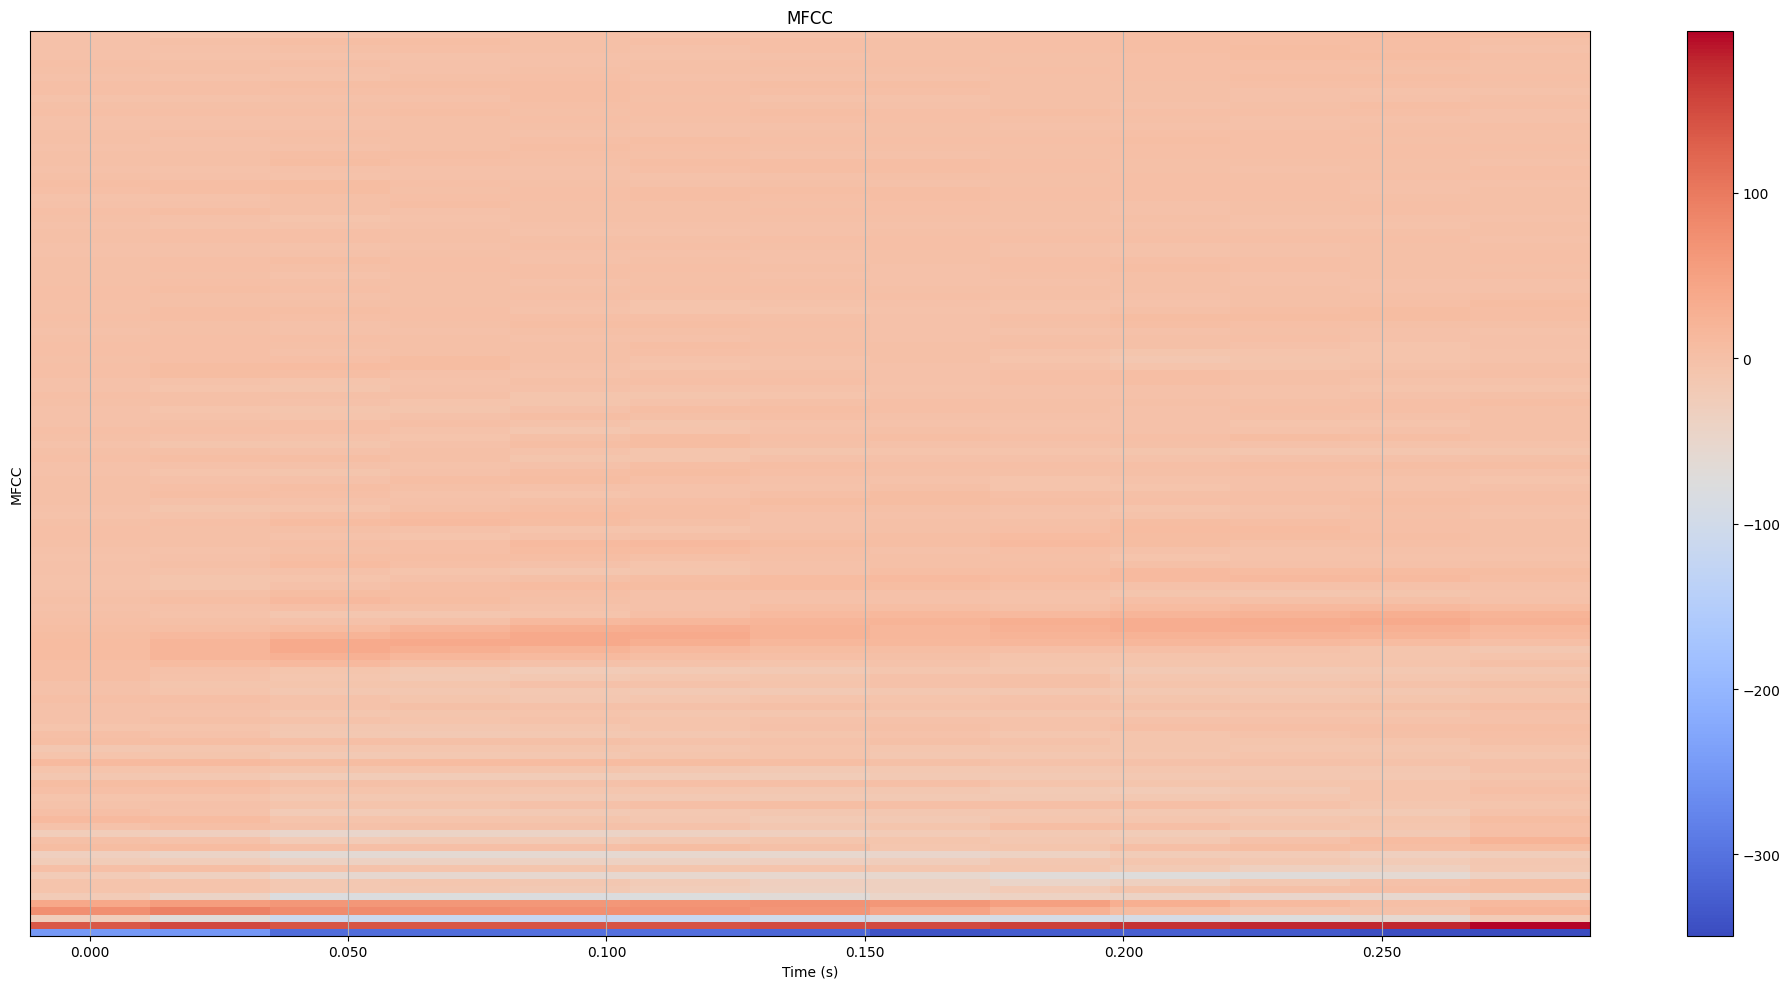

In [8]:
y, sr = librosa.load(file_path)
n_mfcc=128

mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

# Display the MFCC
plt.figure(figsize=(20, 10))  # Increase figure size
img = librosa.display.specshow(mfcc, sr=sr, x_axis='time')
plt.title('MFCC')
plt.xlabel('Time (s)')  # Add x label with units
plt.ylabel('MFCC')  # Add y label
plt.colorbar(img)  # Add colorbar
plt.grid(True)  # Add a grid
plt.tight_layout()
plt.show()

## Fast Fourier Transform

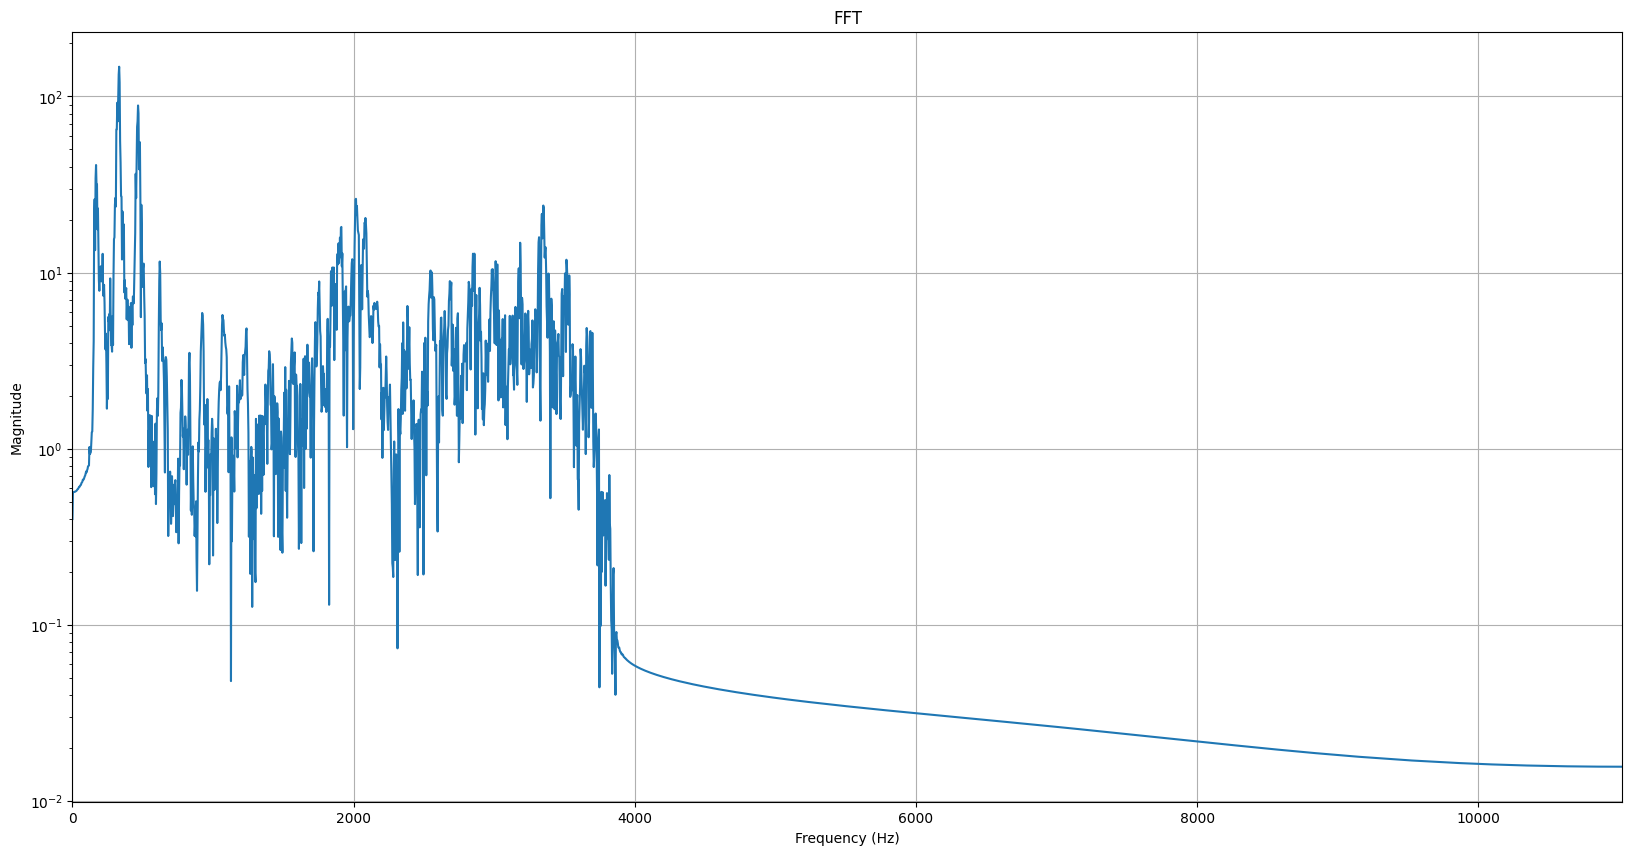

In [9]:
y, sr = librosa.load(file_path)
log_scale = True  # Change this to False for linear scale

# Apply FFT
fft_out = np.fft.rfft(y)

# Get frequencies corresponding to the FFT values
freqs = np.fft.rfftfreq(len(y), 1/sr)

# Plot the FFT
plt.figure(figsize=(20, 10))  # Increase figure size
plt.plot(freqs, np.abs(fft_out))
plt.title('FFT')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
if log_scale:
    plt.yscale('log')  # Logarithmic scale for y-axis
plt.grid(True)  # Add a grid
plt.xlim([0, sr/2])  # Limit frequency range
plt.show()


# Conversions

## Audio to mel

In [10]:
# Define parameters
n_mels = 128

# Define the source and target directories
src_dir = r'FSDD Mini'
target_dir = r'Output/Mel'

# Get list of subdirectories in source directory
subdirs = [d for d in os.listdir(src_dir) if os.path.isdir(os.path.join(src_dir, d))]

# Loop over subdirectories
for subdir in subdirs:
    src_subdir = os.path.join(src_dir, subdir)
    target_subdir = os.path.join(target_dir, subdir)

    # Create target subdirectory if it doesn't exist
    os.makedirs(target_subdir, exist_ok=True)

    # Get list of files in source subdirectory
    files = os.listdir(src_subdir)

    # Loop over files in source subdirectory with tqdm progress bar
    for file_name in tqdm(files, desc=f'Processing files in directory {subdir}'):
        src_file_path = os.path.join(src_subdir, file_name)
        target_file_path = os.path.join(target_subdir, file_name.replace('.wav', '.png'))

        # Convert audio to a Mel spectrogram
        y, sr = librosa.load(src_file_path, sr=sr)  # Specify the sampling rate here
        S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
        log_S = librosa.power_to_db(S, ref=np.max)

        # Normalize to [0, 255] and convert to uint8
        img = ((log_S - log_S.min()) / (log_S.max() - log_S.min()) * 255).astype(np.uint8)

        # Save the Mel spectrogram as a PNG image
        imageio.imwrite(target_file_path, img)

Processing files in directory 0:   0%|          | 0/10 [00:00<?, ?it/s]

Processing files in directory 1:   0%|          | 0/10 [00:00<?, ?it/s]

## Audio to MFCC

In [11]:
# Define parameters
hop_length = 512
n_mfcc = 128

# Define the source and target directories
src_dir = r'FSDD Mini'
target_dir = r'Output/MFCC'

# Get list of subdirectories in source directory
subdirs = [d for d in os.listdir(src_dir) if os.path.isdir(os.path.join(src_dir, d))]

# Loop over subdirectories
for subdir in subdirs:
    src_subdir = os.path.join(src_dir, subdir)
    target_subdir = os.path.join(target_dir, subdir)

    # Create target subdirectory if it doesn't exist
    os.makedirs(target_subdir, exist_ok=True)

    # Get list of files in source subdirectory
    files = os.listdir(src_subdir)

    # Loop over files in source subdirectory with tqdm progress bar
    for file_name in tqdm(files, desc=f'Processing files in directory {subdir}'):
        src_file_path = os.path.join(src_subdir, file_name)
        target_file_path = os.path.join(target_subdir, file_name.replace('.wav', '.png'))

        # Convert audio to MFCC
        y, sr = librosa.load(src_file_path, sr=sr)  # Specify the sampling rate here
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, hop_length=hop_length)

        # Normalize to [0, 255] and convert to uint8
        img = ((mfcc - mfcc.min()) / (mfcc.max() - mfcc.min()) * 255).astype(np.uint8)

        # Save the MFCC as a PNG image
        imageio.imwrite(target_file_path, img)

Processing files in directory 0:   0%|          | 0/10 [00:00<?, ?it/s]

Processing files in directory 1:   0%|          | 0/10 [00:00<?, ?it/s]